## Получение информации о таблицах базы данных

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type ='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql


## Возвращает первые 5 строк таблицы фактов

In [2]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Сводная статистика

In [3]:
q3 = "SELECT MIN(population) pop_min, MAX(population) pop_max, MIN(population_growth) pop_grwth_min, MAX(population_growth) pop_grwth_max FROM facts;"
pd.read_sql_query(q3,conn)

,pop_min,pop_max,pop_grwth_min,pop_grwth_max
0,0,7256490011,0.0,4.02


## Страна (страны) с нулевым населением

In [4]:
q4 = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts);"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


## Страны с населением в 7,2 миллиарда человек

In [5]:
q5 = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts);"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Страна с самым высоким приростом населения в 4 раза превышает прирост населения в мире.

/tmp/ipython-input-6-1692193384.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.read_sql_query(q6, conn).hist(ax=ax)


array([[<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'population_growth'}>],
       [<Axes: title={'center': 'birth_rate'}>,
        <Axes: title={'center': 'death_rate'}>]], dtype=object)

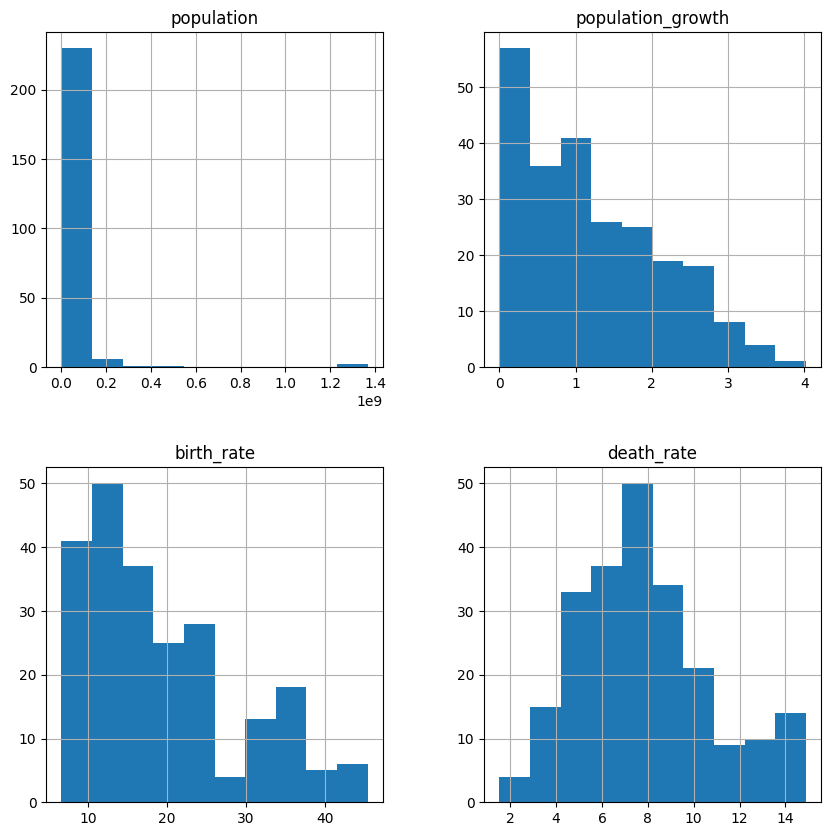

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
q6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MAX(population) FROM facts) AND population != (SELECT MIN(population) FROM facts);"
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(q6, conn).hist(ax=ax)


## Какие страны имеют самую высокую плотность населения?

In [7]:
q7 = "SELECT name, CAST(population/area_land as Float) pop_density FROM facts ORDER BY pop_density DESC LIMIT 25"
pd.read_sql_query(q7, conn)

,name,pop_density
0,Macau,21168.0
1,Monaco,15267.0
2,Singapore,8259.0
3,Hong Kong,6655.0
4,Gaza Strip,5191.0
5,Gibraltar,4876.0
6,Bahrain,1771.0
7,Maldives,1319.0
8,Malta,1310.0
9,Bermuda,1299.0


Макао – самая густонаселенная страна в мире. В топ-25 самых густонаселенных стран мира входит довольно много небольших островов, большинство из которых имеют тропический климат.

array([<Axes: title={'center': 'pop_density'}>], dtype=object)

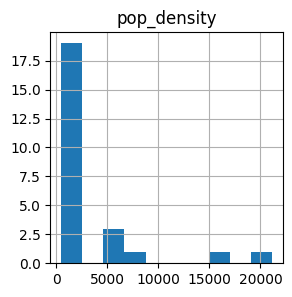

In [8]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()
pd.read_sql_query(q7, conn).hist(ax=ax)

## Самое высокое соотношение воды к суше

In [9]:
q8 = "SELECT name, CAST(area_water/area_land as Float) water_to_land FROM facts ORDER BY water_to_land DESC LIMIT 25;"
pd.read_sql_query(q8, conn)

,name,water_to_land
0,British Indian Ocean Territory,905.0
1,Virgin Islands,4.0
2,Afghanistan,0.0
3,Albania,0.0
4,Algeria,0.0
5,Andorra,0.0
6,Angola,0.0
7,Antigua and Barbuda,0.0
8,Argentina,0.0
9,Armenia,0.0


Британская территория в Индийском океане имеет самое большое соотношение воды и суши. Это территория, состоящая примерно из 1000 небольших островов на сотнях тысяч квадратных миль океана. Он имеет коэффициент 905, а следующий ближайший коэффициент равен 4.

In [10]:
q9 ="SELECT name, area_water, area_land FROM facts WHERE area_water > area_land ORDER BY area_water DESC"
pd.read_sql_query(q9, conn)

,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346


## Существует ли корреляция между размером страны и уровнем миграции?

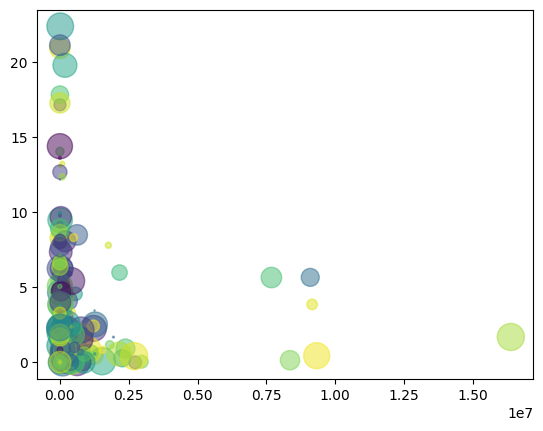

In [11]:
import numpy as np
np.random.seed(19680801)

q10 ="SELECT area_land, migration_rate FROM facts;"
df =pd.read_sql_query(q10, conn)
N=len(df.index)
colors = np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(df.area_land,df.migration_rate,s=area, c=colors, alpha=0.5)


### Выводы

Полученные данные свидетельствуют об отрицательной корреляции между площадью территории страны и уровнем миграции. Все страны с уровнем миграции выше 8 имеют небольшие территории. Во всех странах с большей территорией уровень миграции составляет 6 или ниже. Это можно объяснить тем фактом, что большинство стран с меньшей площадью суши имеют меньшую способность экономически обеспечивать свое население, что приводит к миграции людей в другие страны, где возможностей предостаточно.
